In [1]:
import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Define ODE model and plotting function

# define SIDARTHE_model
def SIDARTHE_model(y, t, alpha, beta, gamma, delta, epsilon, mu, zeta, lamb, eta, rho, theta, kappa, nu, xi, sigma, tau):
    S, I, D, A, R, T, H, E = y
    dSdt = -S*(alpha(t)*I + beta(t)*D + gamma(t)*A + delta(t)*R)
    dIdt = S*(alpha(t)*I + beta(t)*D + gamma(t)*A + delta(t)*R) - (epsilon(t) + zeta(t) + lamb(t))*I
    dDdt = epsilon(t)*I - (eta(t) + rho(t))*D
    dAdt = zeta(t)*I - (theta(t) + mu(t) + kappa(t))*A
    dRdt = eta(t)*D + theta(t)*A - (nu(t) + xi(t))*R
    dTdt = mu(t)*A + nu(t)*R - (sigma(t) + tau(t))*T
    dHdt = lamb(t)*I + rho(t)*D + kappa(t)*A + xi(t)*R + sigma(t)*T
    dEdt = tau(t)*T

    return dSdt, dIdt, dDdt, dAdt, dRdt, dTdt, dHdt, dEdt

#  plot SIDARTHE model
def plotSIDARTHE(t, S, I, D, A, R, T, H, E):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected (Asymptomatic, Infected, Undetected)')
    ax.plot(t, D, 'r.', alpha=0.7, linewidth=2, label='Diagnosed (Asymptomatic, Infected, Detected)')
    ax.plot(t, A, 'r:', alpha=0.7, linewidth=2, label='Ailing (Symptomatic, Infected, Undetected)')
    ax.plot(t, R, 'r--', alpha=0.7, linewidth=2, label='Recognized (Symptomatic, Infected, Detected)')
    ax.plot(t, T, 'r-.', alpha=0.7, linewidth=2, label='Threatened (Acutely Symptomatic)')
    ax.plot(t, H, 'g', alpha=0.7, linewidth=2, label='Healed')
    ax.plot(t, E, 'k', alpha=0.7, linewidth=2, label='Extinct (Dead)')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Fraction of population')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
#    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show();


In [3]:
# initialize recording of parameter choices and true/false

param_choices_true_false = []

### Start here at each iteration by changing the values of the parameters, then run the following cells to observe the simulation and tell whether the parameter settings are what you're looking for (1) or not (0).

In [5]:
alpha_val = 0.57
beta_val = 0.011
delta_val = 0.011
gamma_val = 0.456

epsilon_val = 0.171
theta_val = 0.371

zeta_val = 0.125
eta_val = 0.125

mu_val = 0.017
nu_val = 0.027
lamb_val = 0.034
rho_val = 0.034

kappa_val = 0.017
xi_val = 0.017
sigma_val = 0.017

tau_val = 0.01

In [6]:
# set parameter values
def alpha(t): return np.piecewise(t, [t>=0], [alpha_val])
def beta(t): return np.piecewise(t, [t>=0], [beta_val])
def delta(t): return np.piecewise(t, [t>=0], [delta_val])
def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])

def epsilon(t): return np.piecewise(t, [t>=0], [epsilon_val])
def theta(t): return np.piecewise(t, [t>=0], [theta_val])

def zeta(t): return np.piecewise(t, [t>=0], [zeta_val])
def eta(t): return np.piecewise(t, [t>=0], [eta_val])

def mu(t): return np.piecewise(t, [t>=0], [mu_val])
def nu(t): return np.piecewise(t, [t>=0], [nu_val])
def lamb(t): return np.piecewise(t, [t>=0], [lamb_val])
def rho(t): return np.piecewise(t, [t>=0], [rho_val])

def kappa(t): return np.piecewise(t, [t>=0], [kappa_val])
def xi(t): return np.piecewise(t, [t>=0], [xi_val])
def sigma(t): return np.piecewise(t, [t>=0], [sigma_val])

def tau(t): return np.piecewise(t, [t>=0], [tau_val])

In [7]:
# set initial conditions

N0 = 60e6
I0, D0, A0, R0, T0, H0, E0 = 200/N0, 20/N0, 1/N0, 2/N0, 0, 0, 0
S0 = 1-I0-D0-A0-R0-T0-H0-E0
y0 = S0, I0, D0, A0, R0, T0, H0, E0 # Initial conditions vector


In [8]:
# set simulation parameters
dt = .5
tstart = 0
tend = 100
tvect = np.arange(tstart, tend, dt)

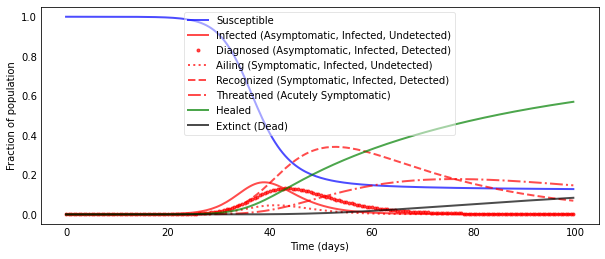

In [9]:
# solve odes
sim = odeint(SIDARTHE_model, y0, tvect, args=(alpha, beta, gamma, delta, epsilon, mu, zeta, lamb, eta, rho, theta, kappa, nu, xi, sigma, tau))
S, I, D, A, R, T, H, E = sim.T

# plot results
plotSIDARTHE(tvect, S, I, D, A, R, T, H, E)

In [10]:
## log parameters and sat/unsat

param_assignments = {'alpha': alpha_val, 'beta': beta_val, 'delta': delta_val, 'gamma': gamma_val, 'epsilon': epsilon_val, 'theta': theta_val, 'zeta': zeta_val, 'eta': eta_val, 'mu': mu_val, 'nu':nu_val, 'lamb':lamb_val, 'rho':rho_val, 'kappa':kappa_val, 'xi':xi_val, 'sigma':sigma_val, 'tau':tau_val,  'assignment': input("Please enter 0 if the parameter choices were bad and 1 if they were good:")}

param_choices_true_false.append(param_assignments)

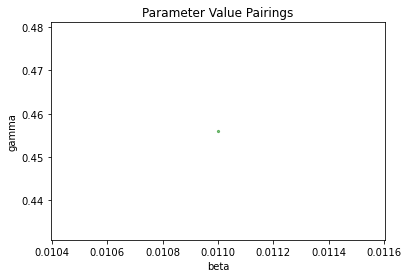

In [11]:
# Plot "true/false" points.  Is there any way of characterizing these regions?


xsample = [result['beta'] for result in param_choices_true_false]
ysample = [result['gamma'] for result in param_choices_true_false]
colors = ['green' if result['assignment'] == '1' else 'red' for result in param_choices_true_false]
plt.title("Parameter Value Pairings")
plt.xlabel("beta")
plt.ylabel("gamma")

area = 5  # 0 to 15 point radii

plt.scatter(xsample, ysample, s=area, c=colors, alpha=0.5)
plt.show()

alpha beta


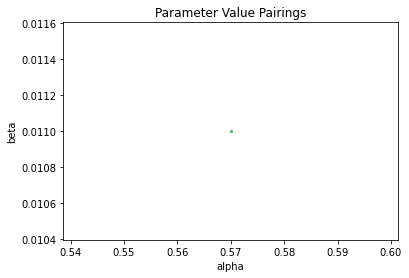

alpha delta


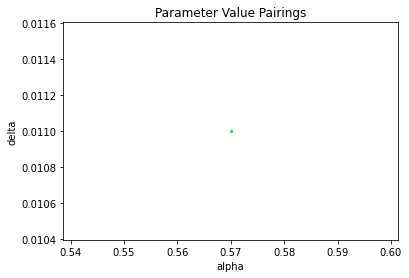

alpha gamma


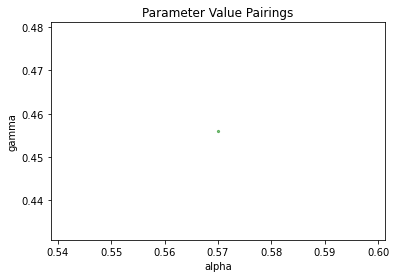

alpha epsilon


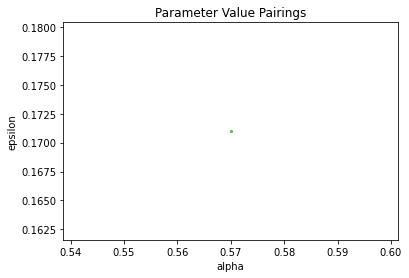

alpha theta


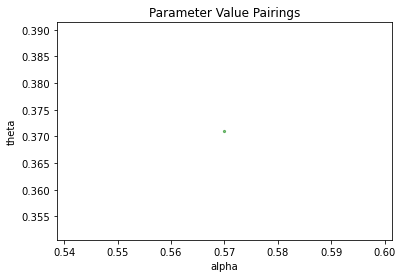

alpha zeta


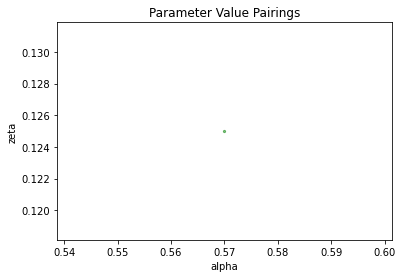

alpha eta


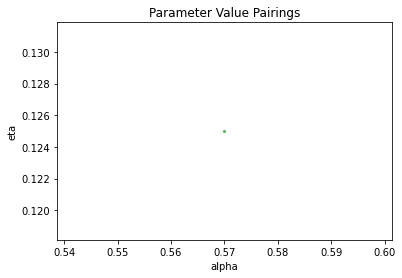

alpha mu


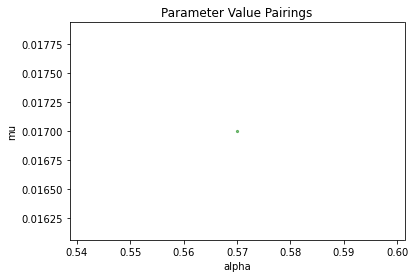

alpha nu


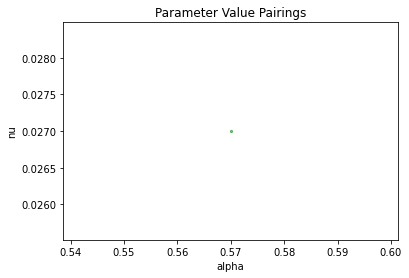

alpha lamb


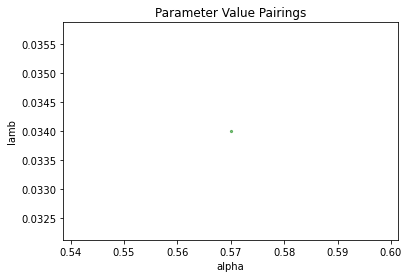

alpha rho


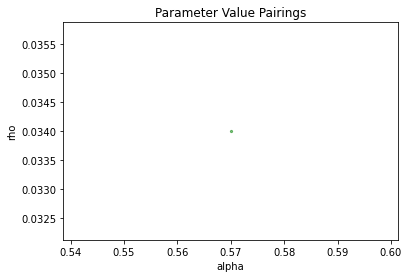

alpha kappa


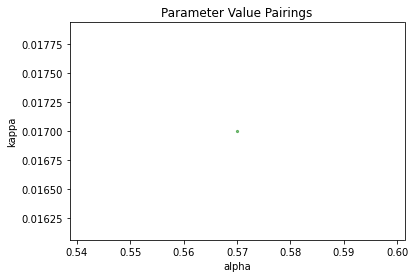

alpha xi


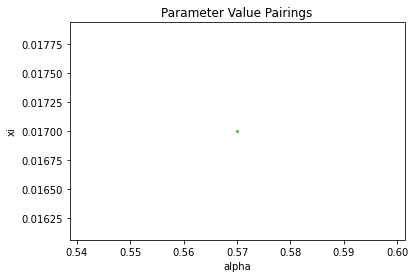

alpha sigma


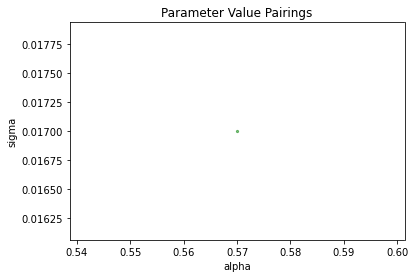

alpha tau


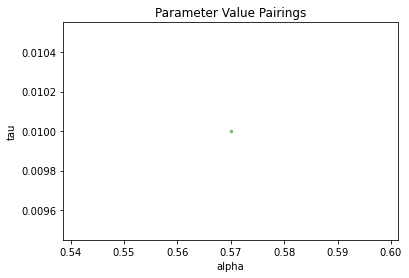

beta delta


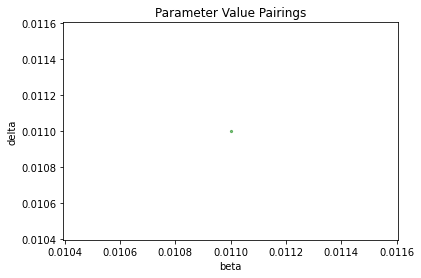

beta gamma


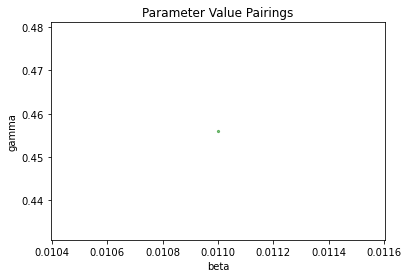

beta epsilon


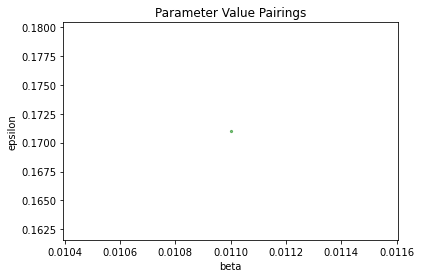

beta theta


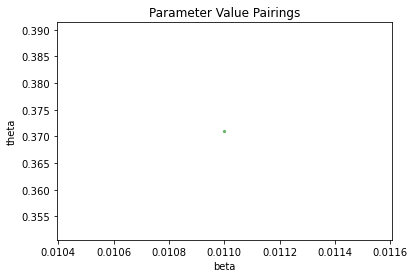

beta zeta


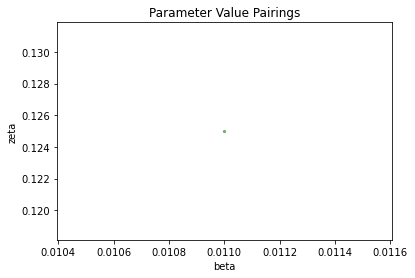

beta eta


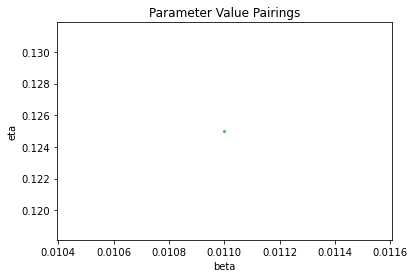

beta mu


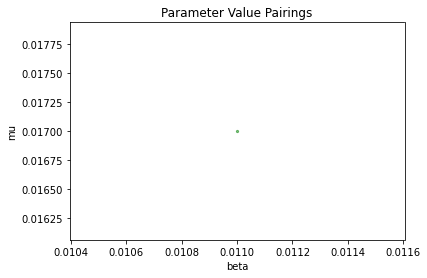

beta nu


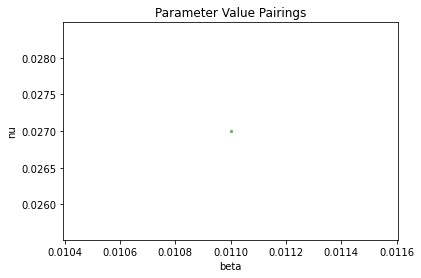

beta lamb


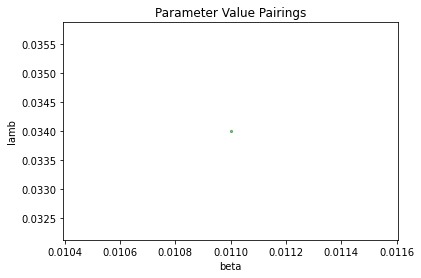

beta rho


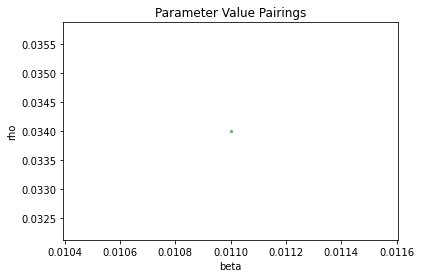

beta kappa


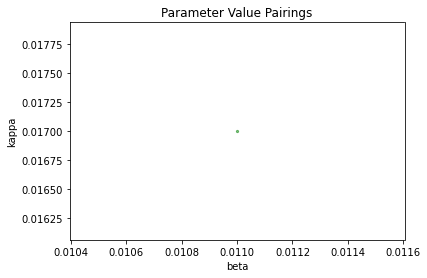

beta xi


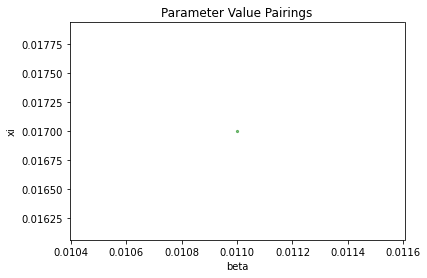

beta sigma


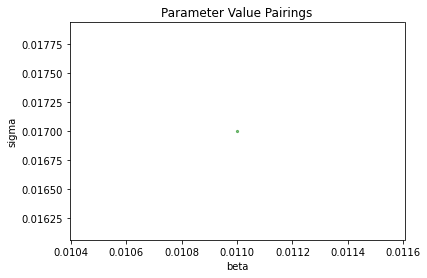

beta tau


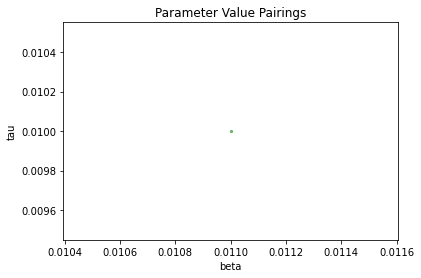

delta gamma


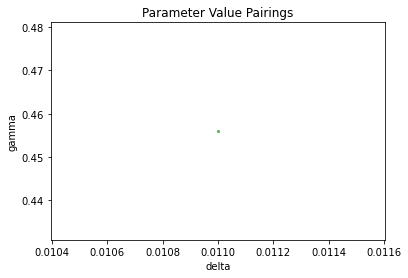

delta epsilon


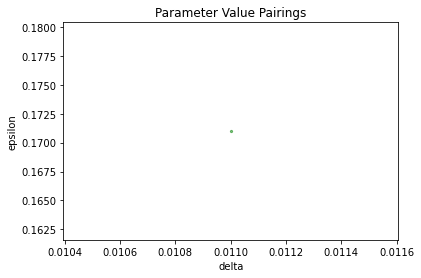

delta theta


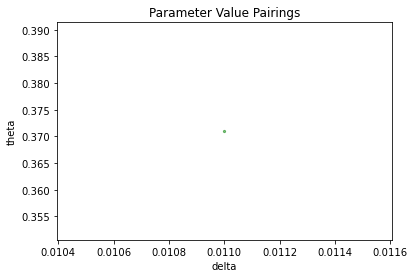

delta zeta


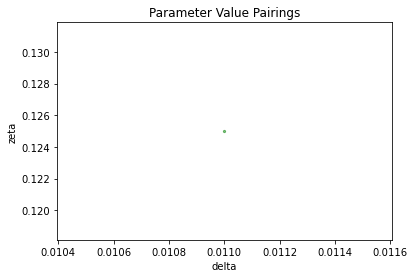

delta eta


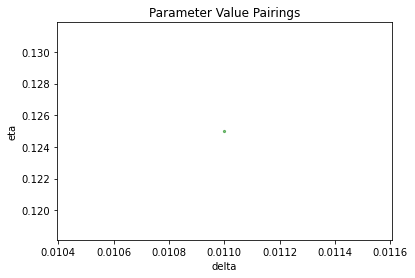

delta mu


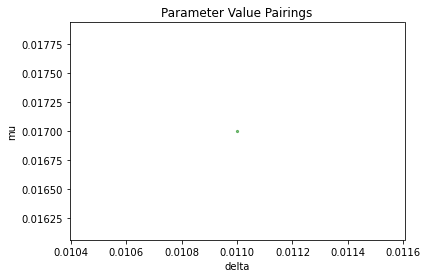

delta nu


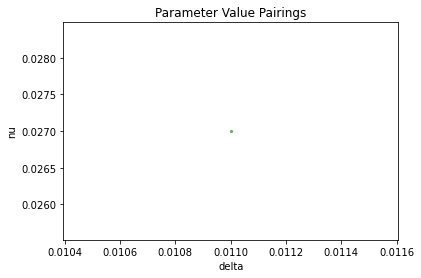

delta lamb


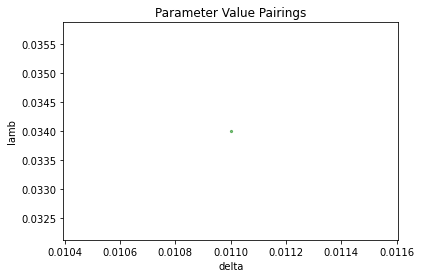

delta rho


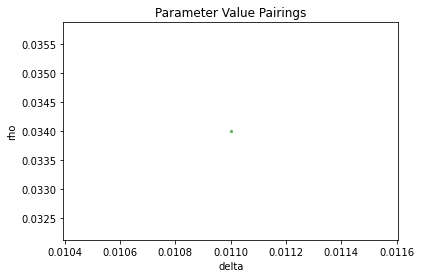

delta kappa


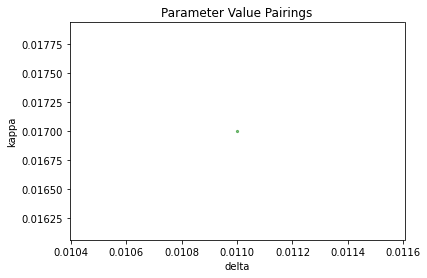

delta xi


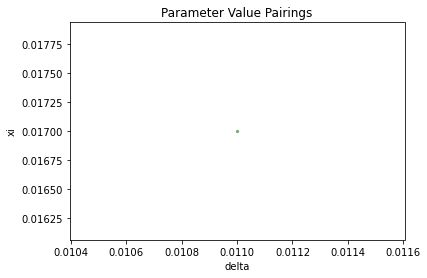

delta sigma


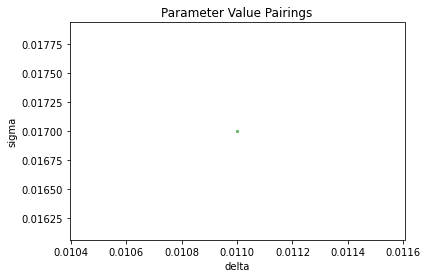

delta tau


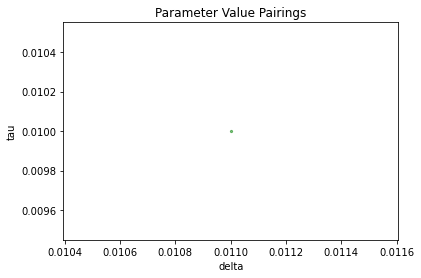

gamma epsilon


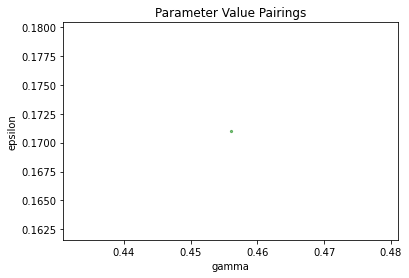

gamma theta


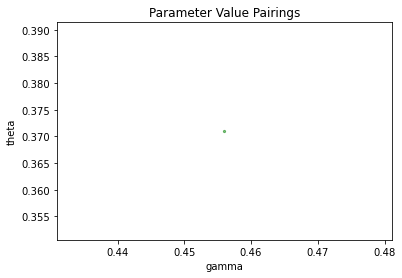

gamma zeta


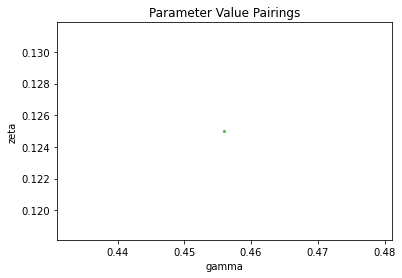

gamma eta


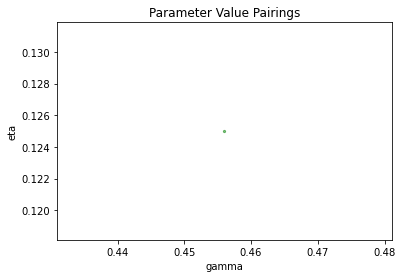

gamma mu


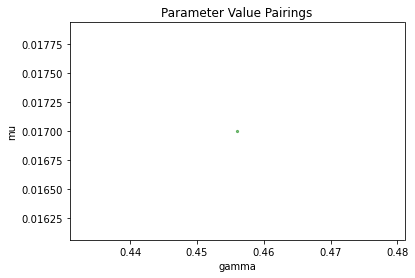

gamma nu


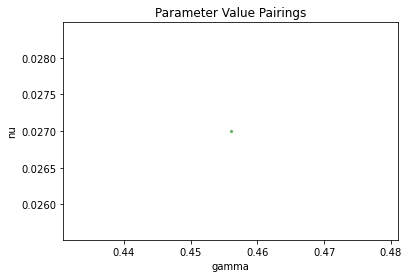

gamma lamb


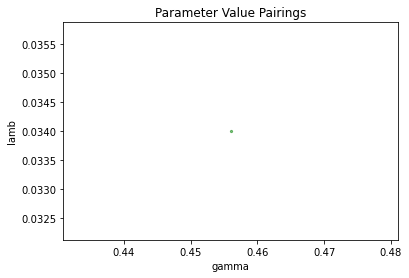

gamma rho


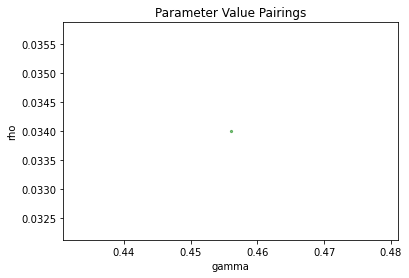

gamma kappa


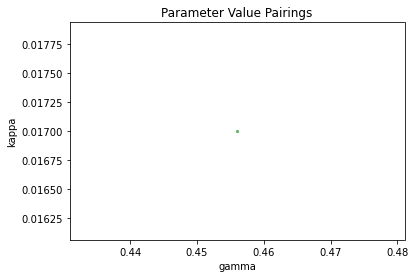

gamma xi


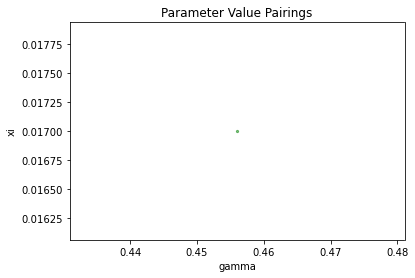

gamma sigma


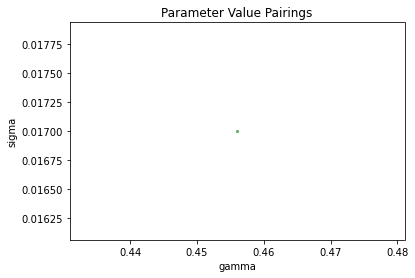

gamma tau


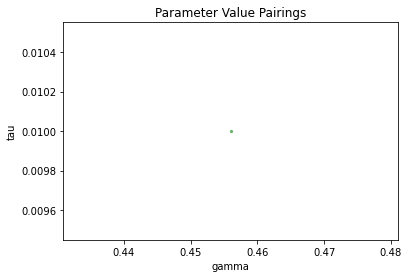

epsilon theta


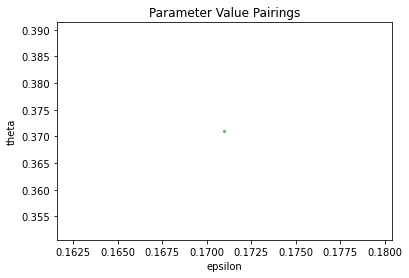

epsilon zeta


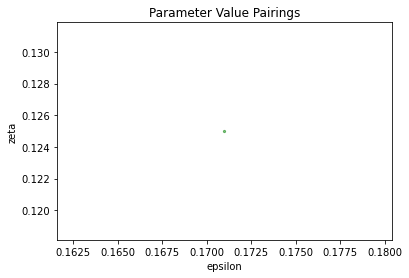

epsilon eta


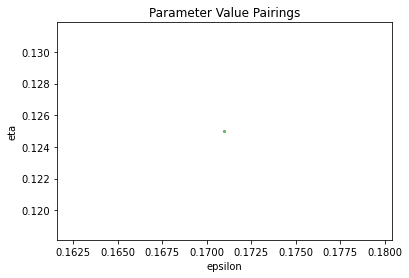

epsilon mu


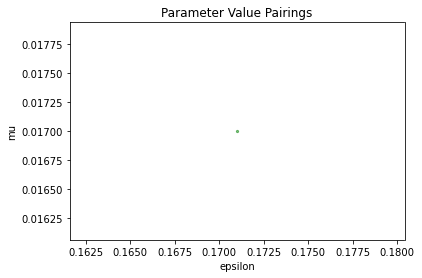

epsilon nu


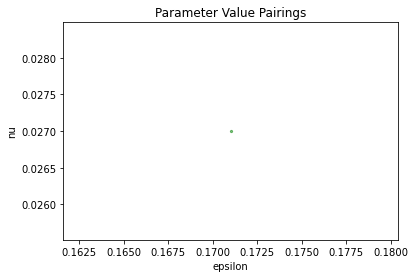

epsilon lamb


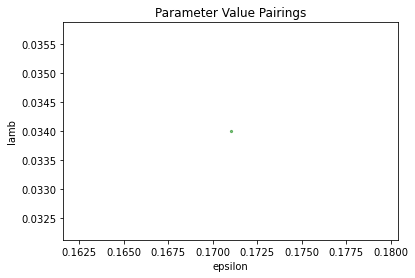

epsilon rho


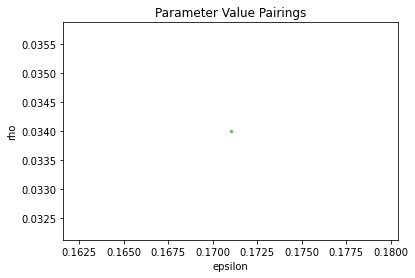

epsilon kappa


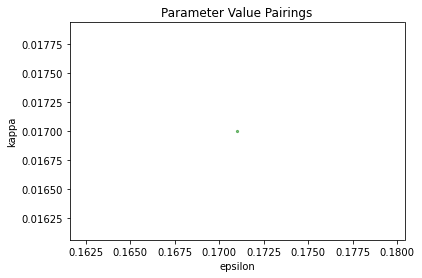

epsilon xi


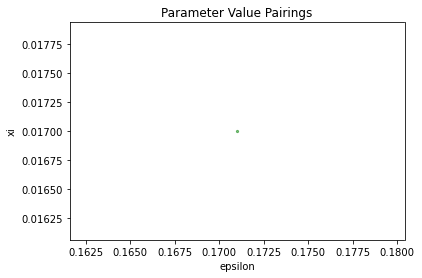

epsilon sigma


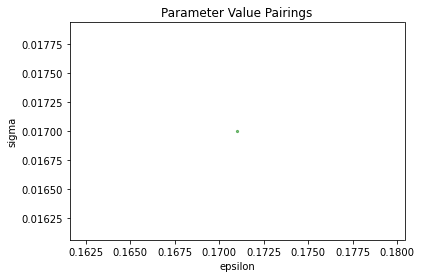

epsilon tau


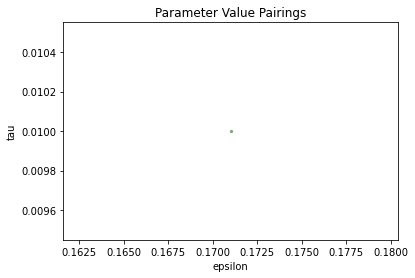

theta zeta


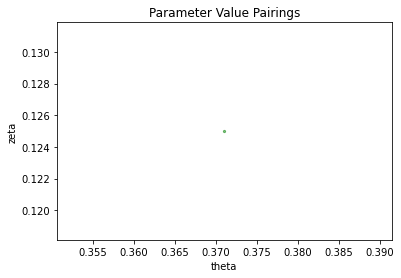

theta eta


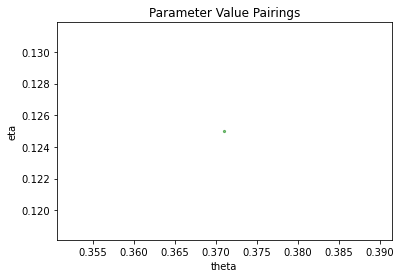

theta mu


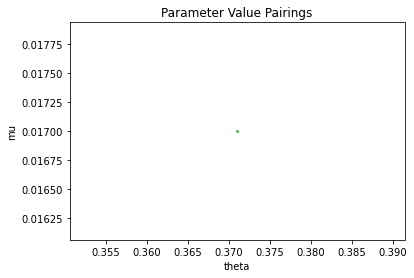

theta nu


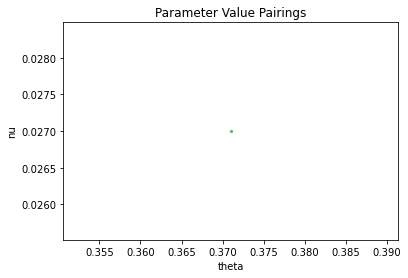

theta lamb


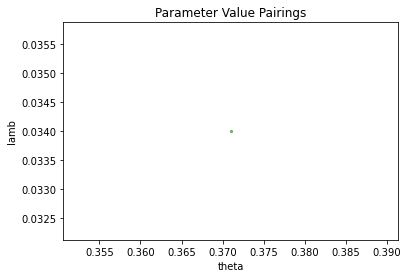

theta rho


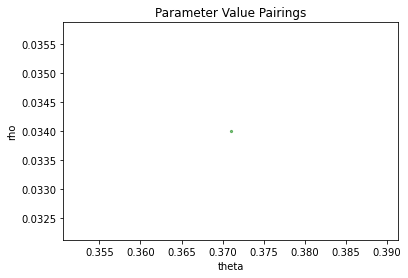

theta kappa


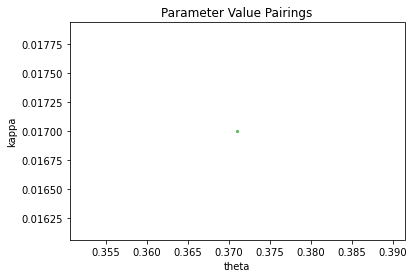

theta xi


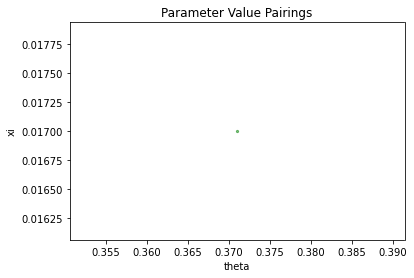

theta sigma


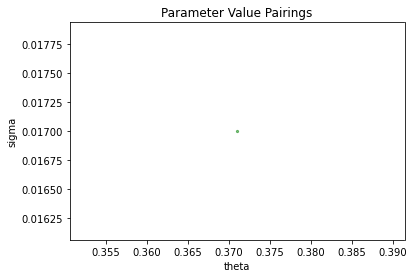

theta tau


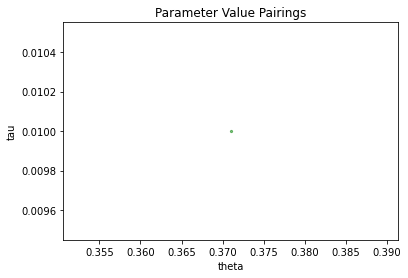

zeta eta


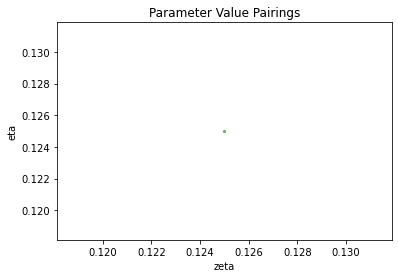

zeta mu


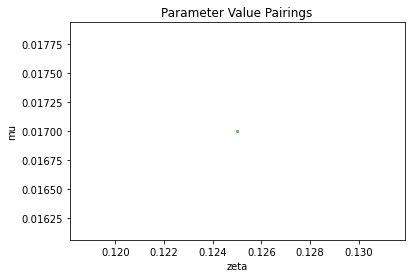

zeta nu


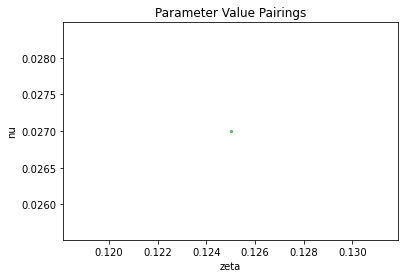

zeta lamb


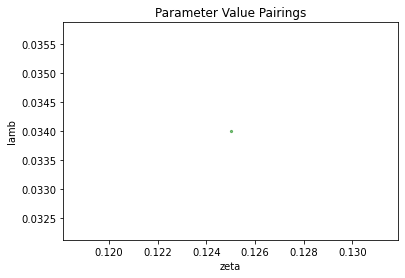

zeta rho


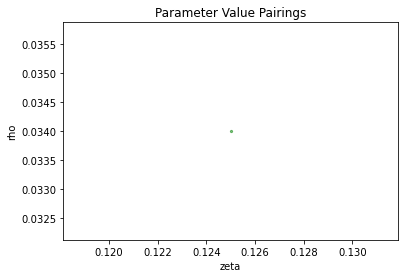

zeta kappa


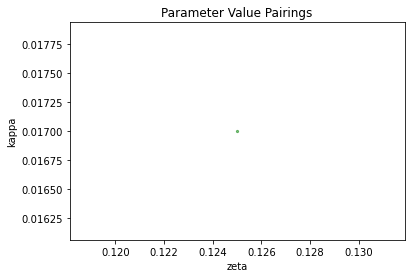

zeta xi


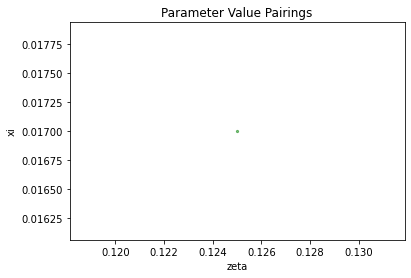

zeta sigma


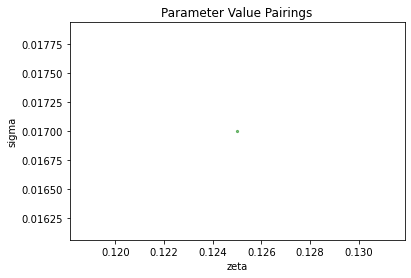

zeta tau


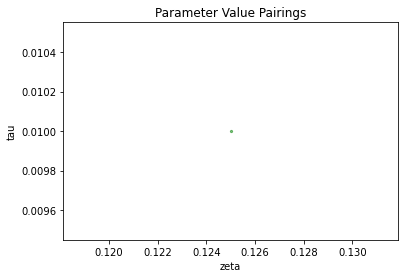

eta mu


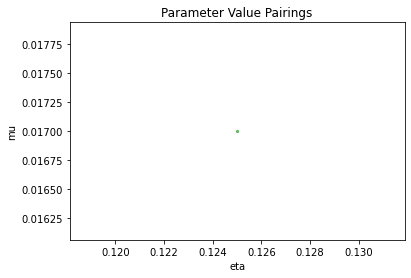

eta nu


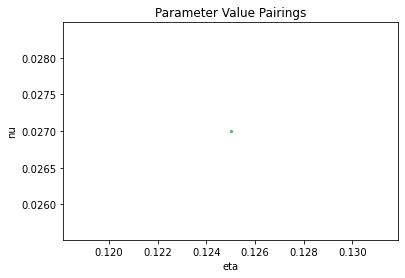

eta lamb


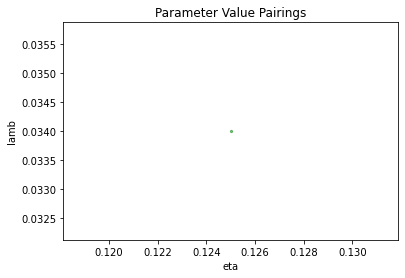

eta rho


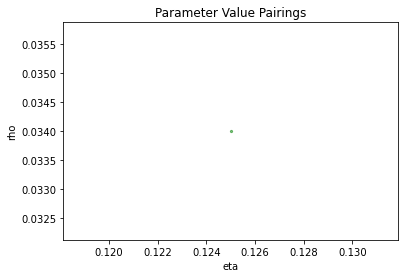

eta kappa


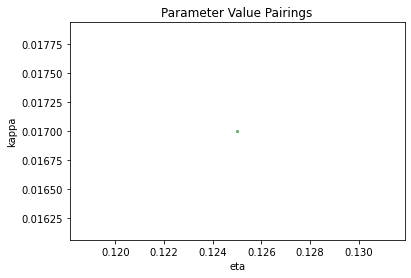

eta xi


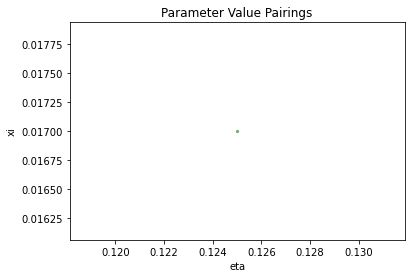

eta sigma


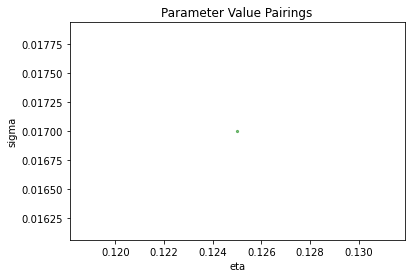

eta tau


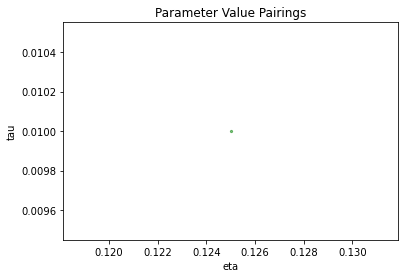

mu nu


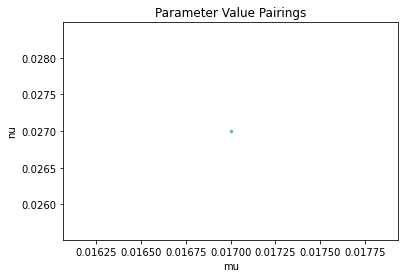

mu lamb


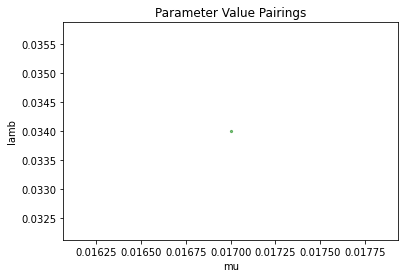

mu rho


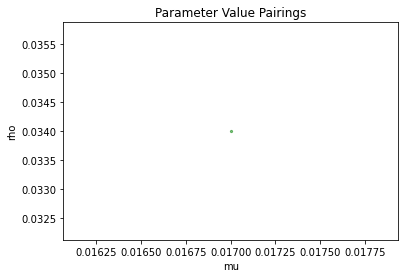

mu kappa


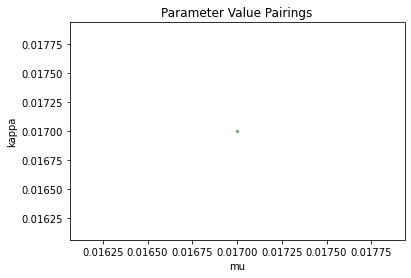

mu xi


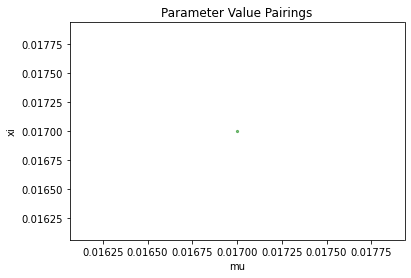

mu sigma


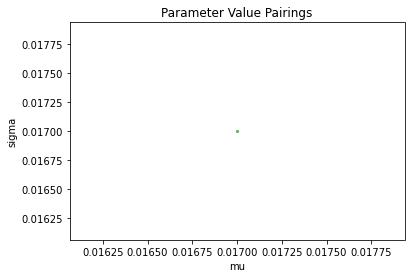

mu tau


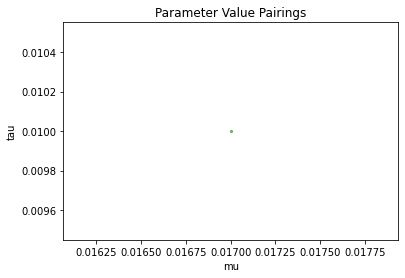

nu lamb


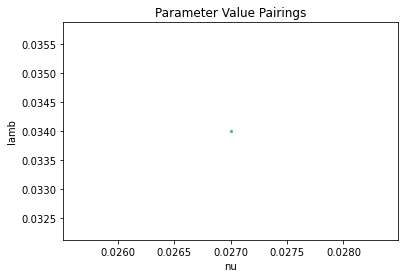

nu rho


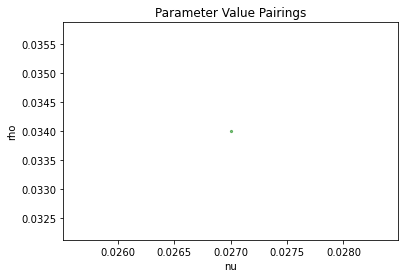

nu kappa


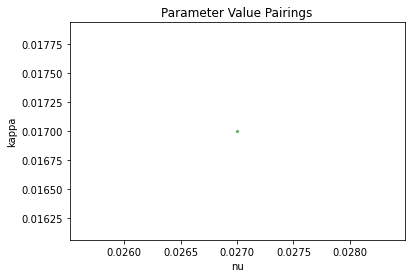

nu xi


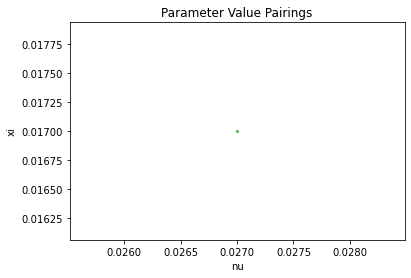

nu sigma


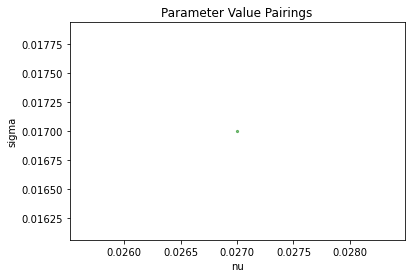

nu tau


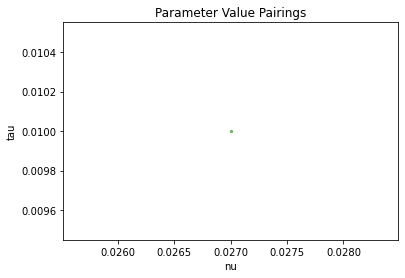

lamb rho


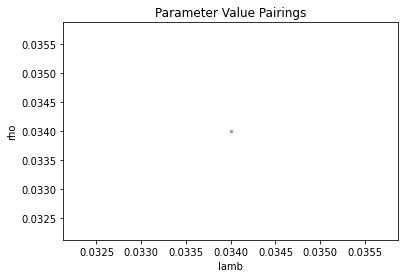

lamb kappa


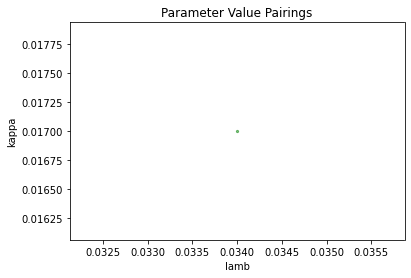

lamb xi


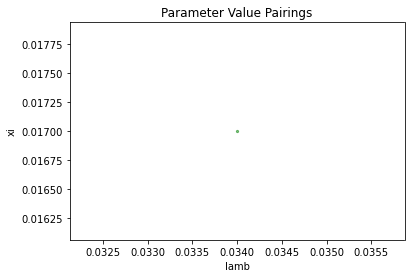

lamb sigma


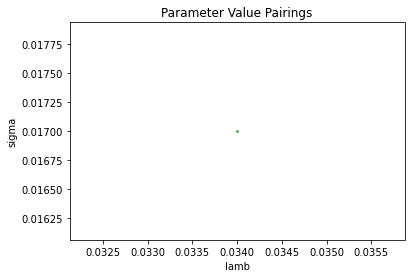

lamb tau


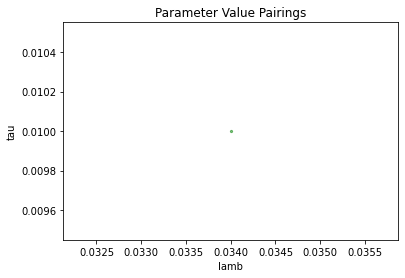

rho kappa


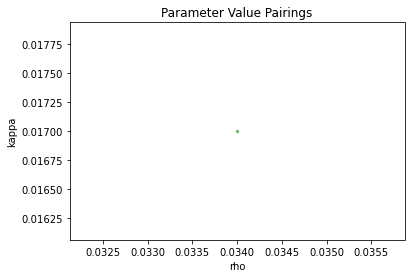

rho xi


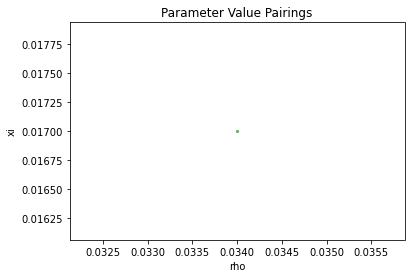

rho sigma


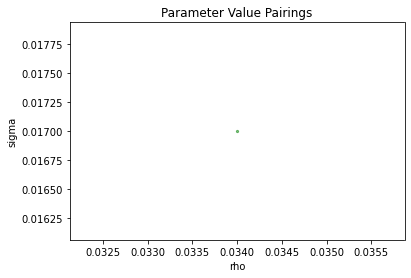

rho tau


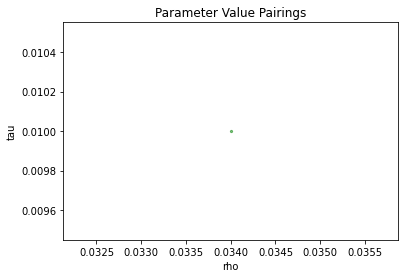

kappa xi


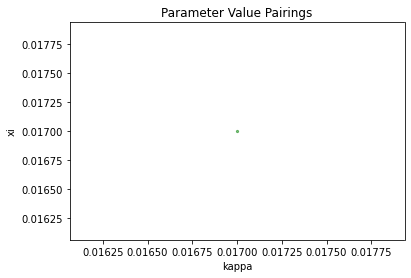

kappa sigma


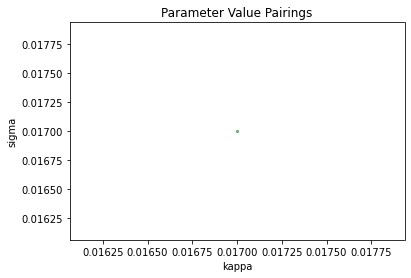

kappa tau


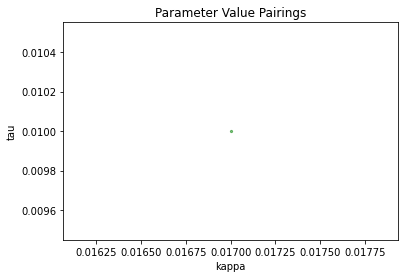

xi sigma


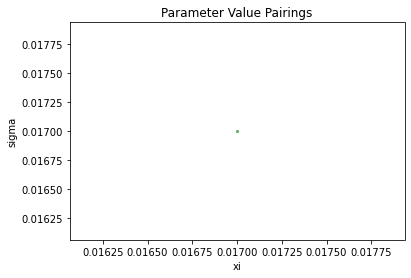

xi tau


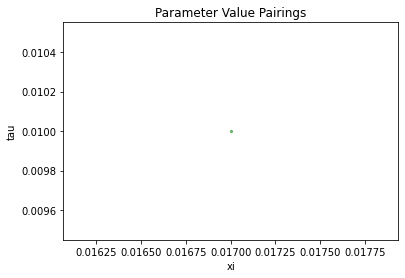

sigma tau


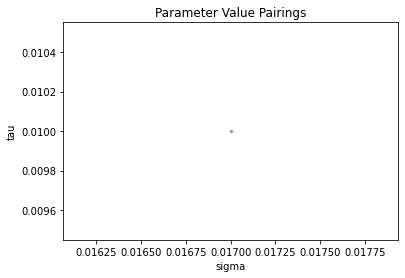

In [14]:
param_choices = list(param_choices_true_false[0].keys())
parameter_list = ([elt for elt in param_choices if elt != 'assignment'])
for i in range(len(parameter_list)):
    for j in range(i+1, len(parameter_list)):
        param1 = parameter_list[i]
        param2 = parameter_list[j]
        print(param1, param2)
        xsample = [result[param1] for result in param_choices_true_false]
        ysample = [result[param2] for result in param_choices_true_false]
        colors = ['green' if result['assignment'] == '1' else 'red' for result in param_choices_true_false]
        plt.title("Parameter Value Pairings")
        plt.xlabel(param1)
        plt.ylabel(param2)

        area = 5  # 0 to 15 point radii

        plt.scatter(xsample, ysample, s=area, c=colors, alpha=0.5)
        plt.show()
